In [1]:
# Importing required libraries
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the dataset with required columns
dataset = pd.read_csv("orgData/kidney_disease.csv")
dataset.rename(columns={'classification':'class'}, inplace=True)
dataset.drop('id',axis=1,inplace=True)

In [3]:
# Print all the statistics of the dataset
print(dataset.head())
print(dataset.shape)
print(dataset.dtypes)
print(dataset.describe())

    age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...   pcv      wc   rc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0  7800.0  5.2  yes  yes   no   good   no   no   ckd  
1    NaN  ...  38.0  6000.0  NaN   no   no   no   good   no   no   ckd  
2  423.0  ...  31.0  7500.0  NaN   no  yes   no   poor   no  yes   ckd  
3  117.0  ...  32.0  6700.0  3.9  yes   no   no   poor  yes  yes   ckd  
4  106.0  ...  35.0  7300.0  4.6   no   no   no   good   no   no   ckd  

[5 rows x 25 columns]
(400, 25)
age      float64
bp       float64
sg       float64
al       float64
su  

In [4]:
"""
The "Object" data type is Categorical data and the "float64" data type is Numerical data.
Creating separate datasets one with numerical data and another with categorical data for easier data pre-processing
"""

column_names = dataset.columns

numerical_vars = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'] # Numerical data variables/features
categorical_vars = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'] # Categorical data variables/features

numerical_df = dataset[numerical_vars]
categorical_df = dataset[categorical_vars]

### Numerical Data Pre-processing

In [5]:
# Calculating the sum of "NA's" and "0" values in all variables/features present in the Numerical data
numerical_null_values = numerical_df.isnull().sum()
numerical_zero_counts = (numerical_df == 0).sum()

# Storing the result in numerical_blank_values
numerical_blank_values = numerical_zero_counts + numerical_null_values

In [6]:
print(numerical_blank_values)

age       9
bp       12
sg       47
al      245
su      339
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64


In [7]:
# Dropping columns with lots of empty values
numerical_df = numerical_df.drop(['al', 'su', 'wc', 'rc'], axis=1)
numerical_vars = numerical_df.columns

In [8]:
print(numerical_df.head())

    age    bp     sg    bgr    bu   sc    sod  pot  hemo   pcv
0  48.0  80.0  1.020  121.0  36.0  1.2    NaN  NaN  15.4  44.0
1   7.0  50.0  1.020    NaN  18.0  0.8    NaN  NaN  11.3  38.0
2  62.0  80.0  1.010  423.0  53.0  1.8    NaN  NaN   9.6  31.0
3  48.0  70.0  1.005  117.0  56.0  3.8  111.0  2.5  11.2  32.0
4  51.0  80.0  1.010  106.0  26.0  1.4    NaN  NaN  11.6  35.0


In [9]:
# Filling the "NA's" and "0" values with median and converting the data type to float64
numerical_df = numerical_df.fillna(numerical_df.median())
numerical_df = numerical_df.astype('float64')

In [10]:
# Checking the Numerical data after removing features/attributes
numerical_null_values = numerical_df.isnull().sum()
numerical_zero_counts = (numerical_df == 0).sum()

# Storing the result in numerical_blank_values
numerical_blank_values = numerical_zero_counts + numerical_null_values

In [11]:
print(numerical_blank_values)
print("\n")
print(numerical_df.head())
print("\n")
print(numerical_df.shape)
print("\n")
print(numerical_df.dtypes)

age     0
bp      0
sg      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
dtype: int64


    age    bp     sg    bgr    bu   sc    sod  pot  hemo   pcv
0  48.0  80.0  1.020  121.0  36.0  1.2  138.0  4.4  15.4  44.0
1   7.0  50.0  1.020  121.0  18.0  0.8  138.0  4.4  11.3  38.0
2  62.0  80.0  1.010  423.0  53.0  1.8  138.0  4.4   9.6  31.0
3  48.0  70.0  1.005  117.0  56.0  3.8  111.0  2.5  11.2  32.0
4  51.0  80.0  1.010  106.0  26.0  1.4  138.0  4.4  11.6  35.0


(400, 10)


age     float64
bp      float64
sg      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv     float64
dtype: object


### Categorical Data Pre-processing

In [12]:
# Checking the Categorical data after removing features/attributes
categorical_null_values = categorical_df.isnull().sum()
categorical_zero_counts = (categorical_df == 0).sum()

# Storing the result in categorical_blank_values
categorical_blank_values = categorical_zero_counts + categorical_null_values
print(categorical_blank_values)

rbc      152
pc        65
pcc        4
ba         4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [13]:
# Dropping columns with lots of empty values
categorical_df = categorical_df.drop(['rbc'], axis=1)
categorical_vars = categorical_df.columns

In [14]:
# Filling the "NA's" and "0" values with mode and converting the data type to float64
categorical_df = categorical_df.fillna(categorical_df.mode().iloc[0])

In [15]:
# Checking the Categorical data after removing features/attributes
categorical_null_values = categorical_df.isnull().sum()
categorical_zero_counts = (categorical_df == 0).sum()

# Storing the result in categorical_blank_values
categorical_blank_values = categorical_zero_counts + categorical_null_values

In [16]:
print(categorical_blank_values)
print("\n")
print(categorical_df.head())
print("\n")
print(categorical_df.shape)
print("\n")
print(categorical_df.dtypes)

pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


         pc         pcc          ba  htn   dm cad appet   pe  ane class
0    normal  notpresent  notpresent  yes  yes  no  good   no   no   ckd
1    normal  notpresent  notpresent   no   no  no  good   no   no   ckd
2    normal  notpresent  notpresent   no  yes  no  poor   no  yes   ckd
3  abnormal     present  notpresent  yes   no  no  poor  yes  yes   ckd
4    normal  notpresent  notpresent   no   no  no  good   no   no   ckd


(400, 10)


pc       object
pcc      object
ba       object
htn      object
dm       object
cad      object
appet    object
pe       object
ane      object
class    object
dtype: object


In [17]:
pd.set_option('future.no_silent_downcasting', True)

# Using binary encoding on categorical data
categorical_df[['htn', 'dm', 'cad', 'pe', 'ane']] = categorical_df[['htn', 'dm', 'cad', 'pe', 'ane']].replace(to_replace={'yes': 1, 'no': 0})
categorical_df[['pc']] = categorical_df[['pc']].replace(to_replace={'abnormal': 1, 'normal': 0})
categorical_df[['pcc', 'ba']] = categorical_df[['pcc', 'ba']].replace(to_replace={'present': 1, 'notpresent': 0})
categorical_df[['appet']] = categorical_df[['appet']].replace(to_replace={'good': 1, 'poor': 0, 'no': np.nan})
categorical_df['class'] = categorical_df['class'].replace(to_replace={'ckd': 1.0, 'ckd\t': 1.0, 'notckd': 0.0, 'no': 0.0})

# # Infer objects to retain the old behaviour
# categorical_df = categorical_df.infer_objects(copy=False)

# Converting the data types in the dataset to float64
categorical_df = categorical_df.astype('float64')

print(categorical_df)

      pc  pcc   ba  htn   dm  cad  appet   pe  ane  class
0    0.0  0.0  0.0  1.0  1.0  0.0    1.0  0.0  0.0    1.0
1    0.0  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0    1.0
2    0.0  0.0  0.0  0.0  1.0  0.0    0.0  0.0  1.0    1.0
3    1.0  1.0  0.0  1.0  0.0  0.0    0.0  1.0  1.0    1.0
4    0.0  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0    1.0
..   ...  ...  ...  ...  ...  ...    ...  ...  ...    ...
395  0.0  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0    0.0
396  0.0  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0    0.0
397  0.0  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0    0.0
398  0.0  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0    0.0
399  0.0  0.0  0.0  0.0  0.0  0.0    1.0  0.0  0.0    0.0

[400 rows x 10 columns]


In [18]:
# merging the dataset
data_processed = pd.concat([numerical_df, categorical_df], axis=1)

In [19]:
print(data_processed.head())
print("\n")
print(data_processed.shape)
print("\n")
print(data_processed.dtypes)

    age    bp     sg    bgr    bu   sc    sod  pot  hemo   pcv   pc  pcc   ba  \
0  48.0  80.0  1.020  121.0  36.0  1.2  138.0  4.4  15.4  44.0  0.0  0.0  0.0   
1   7.0  50.0  1.020  121.0  18.0  0.8  138.0  4.4  11.3  38.0  0.0  0.0  0.0   
2  62.0  80.0  1.010  423.0  53.0  1.8  138.0  4.4   9.6  31.0  0.0  0.0  0.0   
3  48.0  70.0  1.005  117.0  56.0  3.8  111.0  2.5  11.2  32.0  1.0  1.0  0.0   
4  51.0  80.0  1.010  106.0  26.0  1.4  138.0  4.4  11.6  35.0  0.0  0.0  0.0   

   htn   dm  cad  appet   pe  ane  class  
0  1.0  1.0  0.0    1.0  0.0  0.0    1.0  
1  0.0  0.0  0.0    1.0  0.0  0.0    1.0  
2  0.0  1.0  0.0    0.0  0.0  1.0    1.0  
3  1.0  0.0  0.0    0.0  1.0  1.0    1.0  
4  0.0  0.0  0.0    1.0  0.0  0.0    1.0  


(400, 20)


age      float64
bp       float64
sg       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
pc       float64
pcc      float64
ba       float64
htn      float64
dm 

In [20]:
# Shuffling the dataset to remove the bias
idx = np.random.permutation(data_processed.index)

# select the rows of the DataFrame in the shuffled order
shuffled_df = data_processed.loc[idx]

In [21]:
output_dir = 'proData'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Saving the preprocessed dataset
shuffled_df.to_csv(os.path.join(output_dir, 'Final Dataset.csv'), index=False)

In [22]:
# Checking the saved dataset
final_dataset = pd.read_csv("ProData/Final Dataset.csv")

In [23]:
print(final_dataset.head())
print("\n")
print(final_dataset.shape)
print("\n")
print(final_dataset.dtypes)

    age     bp     sg    bgr     bu    sc    sod  pot   hemo   pcv   pc  pcc  \
0  72.0  100.0  1.020  201.0  241.0  13.4  127.0  4.8   9.40  28.0  0.0  0.0   
1  75.0   60.0  1.020  110.0   50.0   0.7  135.0  5.0  14.30  40.0  0.0  0.0   
2  41.0   80.0  1.015  210.0  165.0  18.0  135.0  4.7  12.65  40.0  0.0  0.0   
3   4.0   80.0  1.020   99.0   23.0   0.6  138.0  4.4  12.00  34.0  0.0  0.0   
4  59.0   60.0  1.020  113.0   23.0   1.1  139.0  3.5  15.30  54.0  0.0  0.0   

    ba  htn   dm  cad  appet   pe  ane  class  
0  0.0  1.0  1.0  0.0    1.0  0.0  1.0    1.0  
1  0.0  0.0  0.0  0.0    1.0  0.0  0.0    0.0  
2  0.0  0.0  1.0  0.0    1.0  0.0  0.0    1.0  
3  0.0  0.0  0.0  0.0    1.0  0.0  0.0    1.0  
4  0.0  0.0  0.0  0.0    1.0  0.0  0.0    0.0  


(400, 20)


age      float64
bp       float64
sg       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
pc       float64
pcc      float64
ba       floa

In [24]:
# Dividing the dataset into train and test data for model training and evaluation
X = final_dataset.drop('class', axis=1)
y = final_dataset['class']

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Count the number of instances for each class
class_counts_before = train_labels.value_counts()

# Print the number of samples in each class before SMOTE
print("Number of samples in each class before SMOTE on train data:", class_counts_before)

Number of samples in each class before SMOTE on train data: class
1.0    199
0.0    121
Name: count, dtype: int64


In [26]:
# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the data
train_data, train_labels = smote.fit_resample(train_data, train_labels)

In [27]:
# Count the number of instances for each class
class_counts_after = train_labels.value_counts()

# Print the number of samples in each class after SMOTE
print("Number of samples in each class after SMOTE on train data:", class_counts_after)

Number of samples in each class after SMOTE on train data: class
1.0    199
0.0    199
Name: count, dtype: int64


In [28]:
class_counts_before = pd.DataFrame(data={"class": ["ckd", "notckd"], "count": [class_counts_before[1], class_counts_before[0]]})
class_counts_after = pd.DataFrame(data={"class": ["ckd", "notckd"], "count": [class_counts_after[1], class_counts_after[0]]})

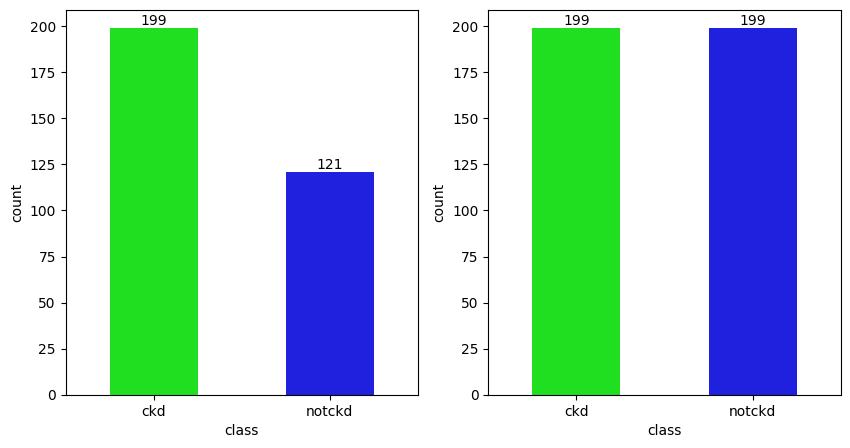

In [29]:
# Countplot [Before and after]
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))

sns.barplot(ax=axes[0], y="count", x="class", data=class_counts_before, hue='class', palette = ["Lime", "blue"], orient="v", width=0.5)

for i in axes[0].containers:
    axes[0].bar_label(i,)

sns.barplot(ax=axes[1], y="count", x="class", data=class_counts_after, hue='class', palette = ["Lime", "blue"], orient="v", width=0.5)

for i in axes[1].containers:
    axes[1].bar_label(i,)

plt.show()

In [30]:
# Save the datasets to the directory
train_data.to_csv(os.path.join(output_dir, 'train_data.csv'), index=False)
test_data.to_csv(os.path.join(output_dir, 'test_data.csv'), index=False)
train_labels.to_csv(os.path.join(output_dir, 'train_labels.csv'), index=False)
test_labels.to_csv(os.path.join(output_dir, 'test_labels.csv'), index=False)

print("Files saved successfully in the proData directory.")

Files saved successfully in the proData directory.


In [31]:
# Checking the saved dataset
train_data = pd.read_csv("ProData/train_data.csv")
test_data = pd.read_csv("ProData/test_data.csv")
train_labels = pd.read_csv("ProData/train_labels.csv")
test_labels = pd.read_csv("ProData/test_labels.csv")